<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Supervised-Models/blob/main/Supervised_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

## Stellar Classification

##  Machine learning models applied
- Logistic Regression
- Decision Tree
- K Nearest Neighbors
- Bagging (or Bootstrap aggregating)
- Random Forest
- Naive Bayes
- Support vector machines (SVMs)
- Adaptive boosting or AdaBoost
- Gradient boosting
- XGBoost
- Voting classifier

## Objective
- In astronomy, stellar classification is the classification of stars based on their spectral characteristics.
- The objective of this project is to classify stars, galaxies, and quasars based on their spectral characteristics.

## Dataset source & brief
- The dataset has been sourced from kaggle and it contains 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey).
- Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
- The columns are obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS, alpha = Right Ascension angle (at J2000 epoch), delta = Declination angle (at J2000 epoch), u = Ultraviolet filter in the photometric system, g = Green filter in the photometric system, r = Red filter in the photometric system, i = Near Infrared filter in the photometric system, z = Infrared filter in the photometric system, run_ID = Run Number used to identify the specific scan, rereun_ID = Rerun Number to specify how the image was processed, cam_col = Camera column to identify the scanline within the run, field_ID = Field number to identify each field, spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class), class = object class (galaxy, star or quasar object), redshift = redshift value based on the increase in wavelength, plate = plate ID, identifies each plate in SDSS, MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken & fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install dataprep

# Data Loading & Preprocessing

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/UM1412/Data-Set/main/StarClassification.csv")
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
df.shape

(100000, 18)

In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.describe().T

count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03

# Exploratory Data Analysis

Data Report
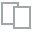
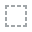
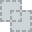
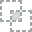
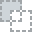
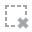
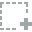
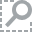
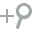
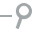
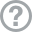
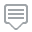
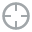
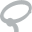
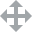
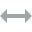
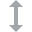
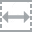
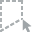
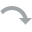
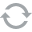
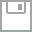
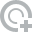
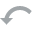
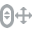
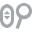
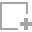
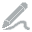
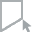
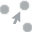
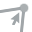
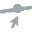

In [ ]:
from dataprep.eda import create_report
report = create_report(df, title='Data Report')
report

**Understanding Class**
- Stars - A star is an astronomical object comprising a luminous spheroid of plasma held together by self-gravity. The nearest star to Earth is the Sun.
- Galaxy- A galaxy is a huge collection of gas, dust, and billions of stars and their solar systems, all held together by gravity.
- Quasar - A quasar is an extremely luminous active galactic nucleus. It is sometimes known as a quasi-stellar object, abbreviated QSO. Compact area in the center of a massive galaxy that is around a supermassive black hole.

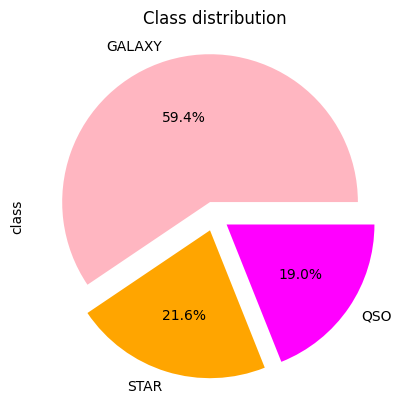

In [ ]:
df['class'].value_counts().plot(kind='pie',colors=('lightpink','orange','fuchsia'),
                                explode=[0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Class distribution')
plt.show()

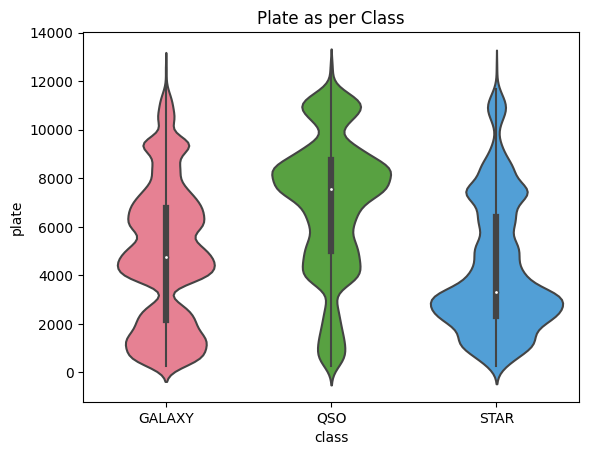

In [ ]:
sns.violinplot(data=df, x=df["class"], y=df["plate"],palette ="husl")
plt.title('Plate as per Class')
plt.show()

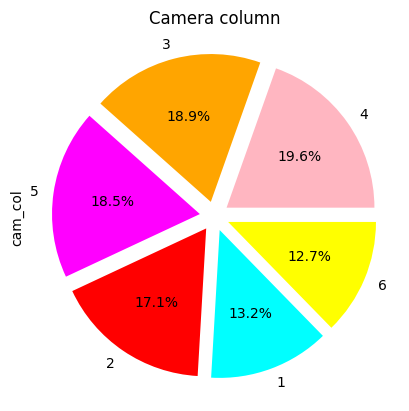

In [ ]:
df['cam_col'].value_counts().plot(kind='pie',colors=('lightpink','orange',
                                                     'fuchsia','red','aqua','yellow'),
                                  explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Camera column')
plt.show()

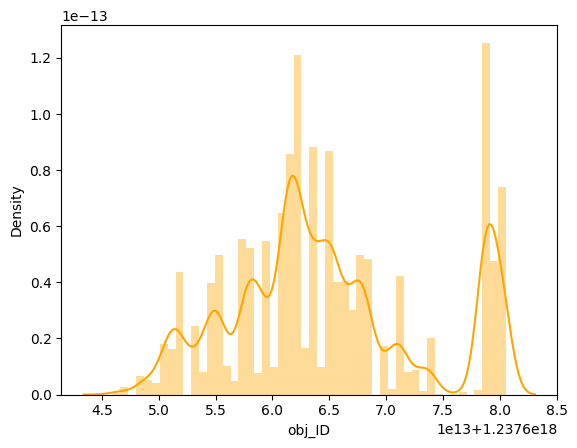

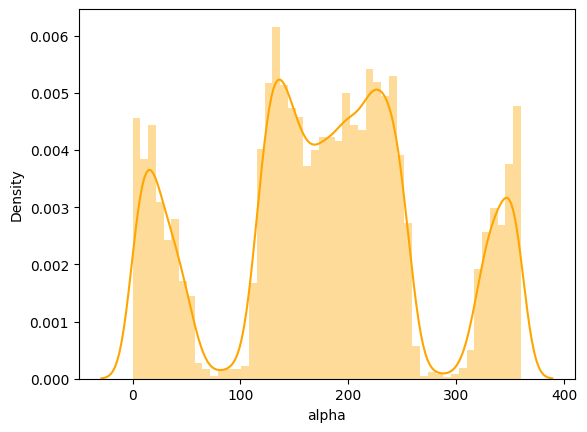

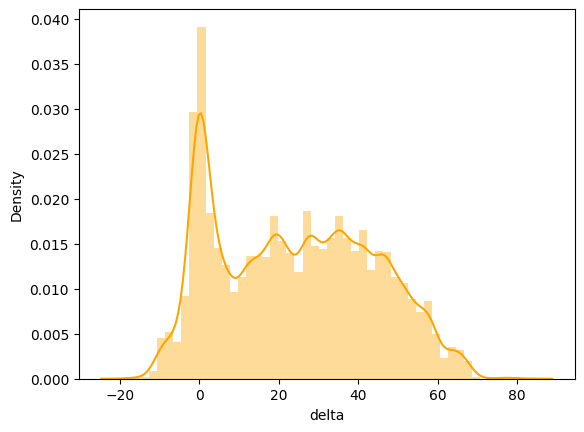

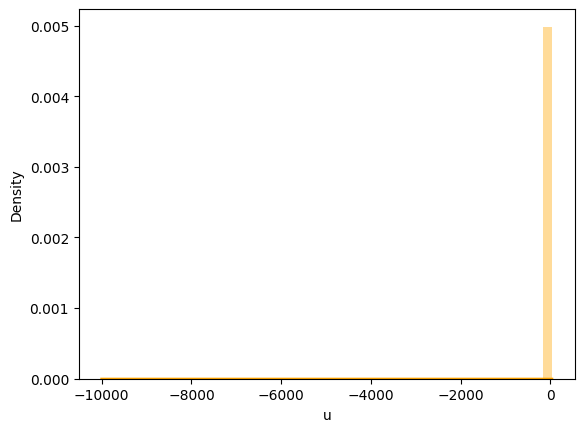

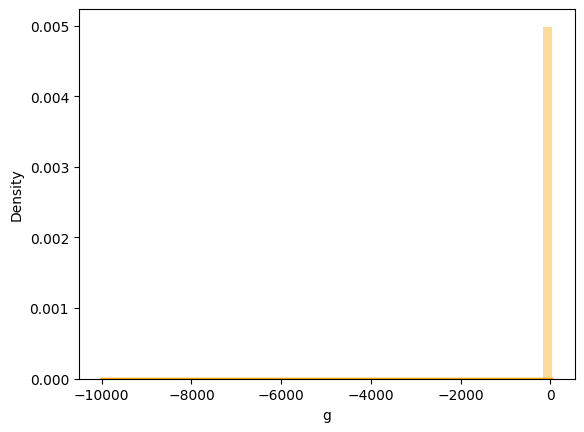

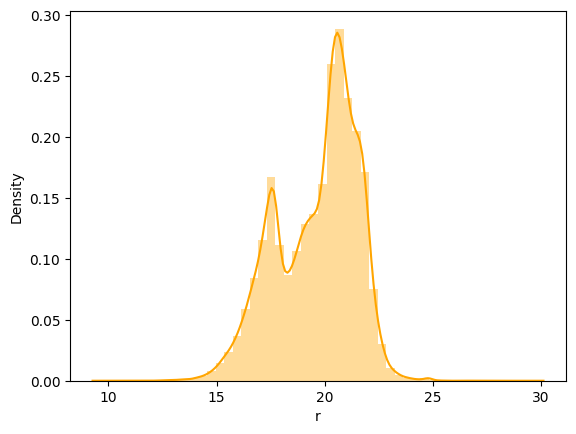

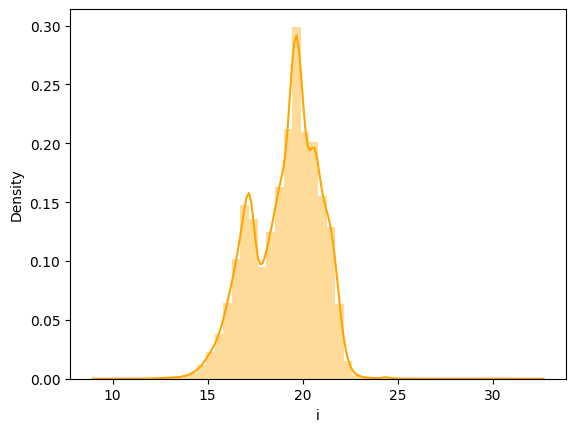

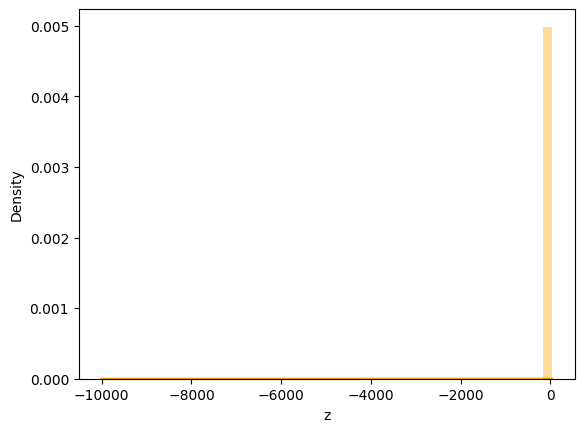

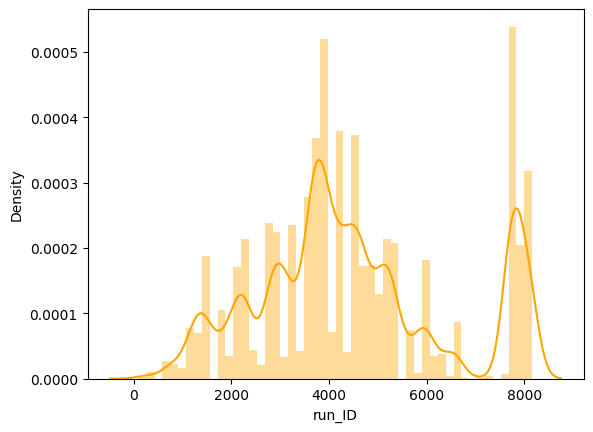

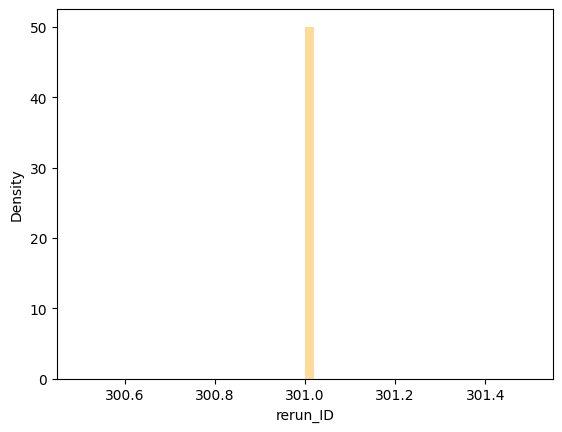

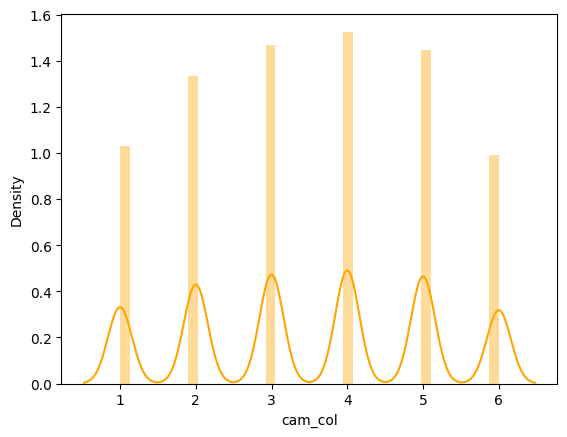

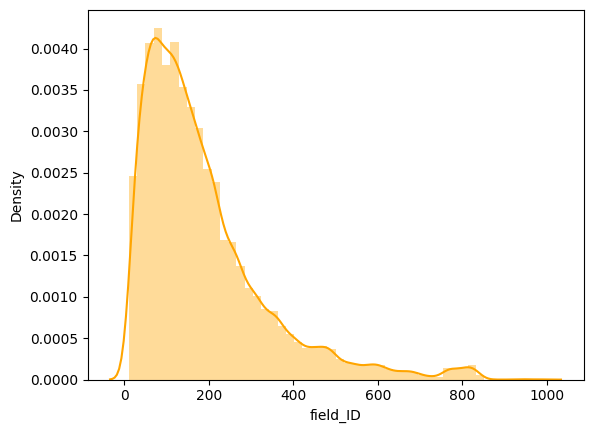

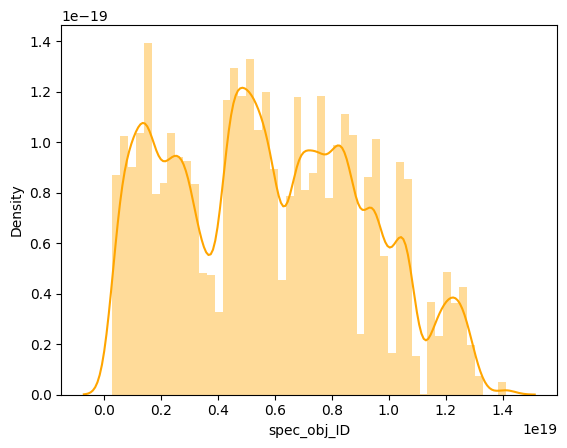

ValueError: ignored

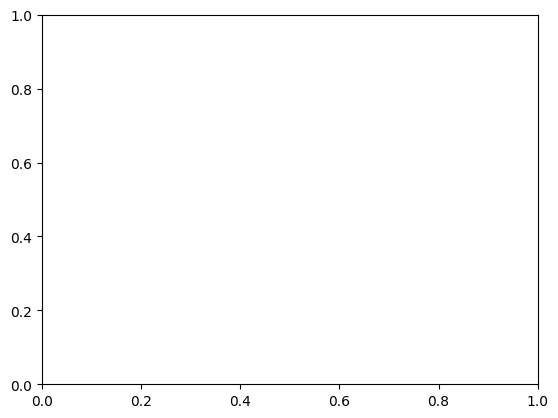

In [ ]:
def distplots(col):
    sns.distplot(df[col],color='orange')
    plt.show()

for i in list(df.columns)[0:]:
    distplots(i)

In [ ]:
df.hist(bins=10, figsize=(16,16),color='pink', edgecolor='purple')
plt.title("Distribution of all variables")
plt.show()

In [ ]:
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID','rerun_ID',
          'cam_col', 'field_ID', 'spec_obj_ID', 'redshift','plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g)

# Correlation matrix
- It is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line. Positive numbers indicate positive correlations, while negative numbers indicate negative correlations. The closer the number is to 1 (or -1), the stronger the correlation. A number of 0 means there is no correlation between the two variables.

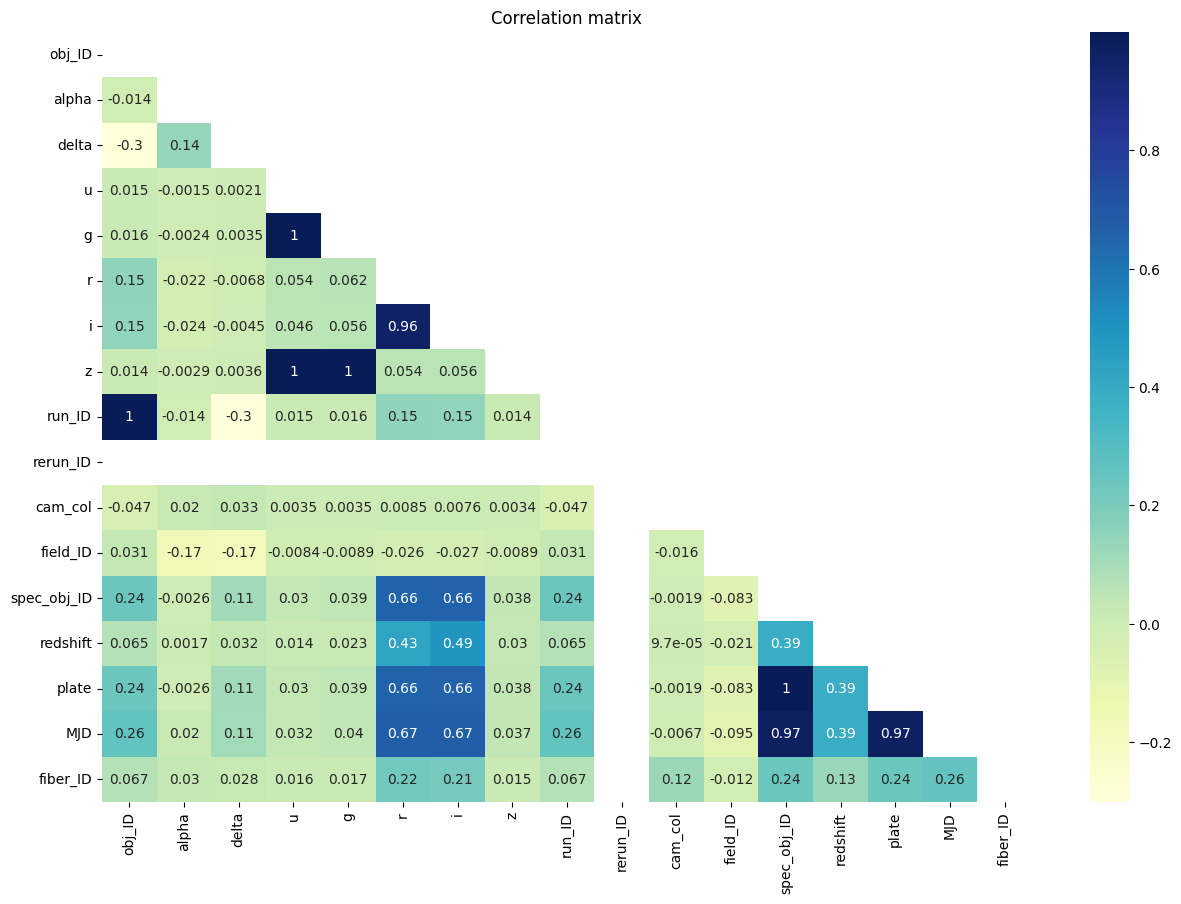

In [ ]:
mask = np.zeros_like(df.corr(), dtype=float)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu', annot_kws={'size':10}, mask=mask)
plt.title('Correlation matrix')
plt.show()

# Feature Transformation

## 1. Segregation of Numerical and Categorical Variables/Columns

In [ ]:
categorical_col = df.select_dtypes(include = ['object']).columns
numerical_col = df.select_dtypes(exclude = ['object']).columns

## 2a. Checking for Outliers
- Outlier is an observation in a given dataset that lies far from the rest of the observations.

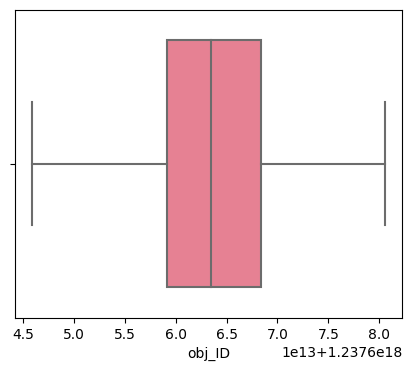

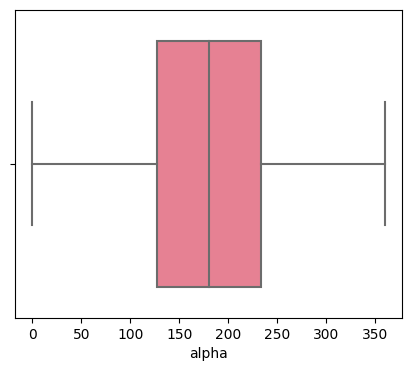

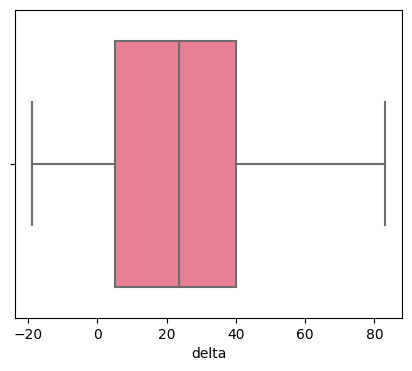

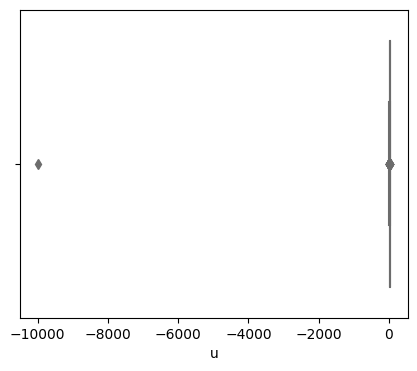

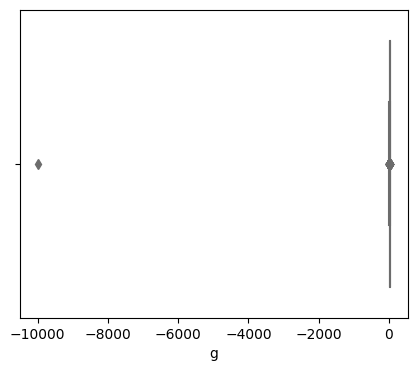

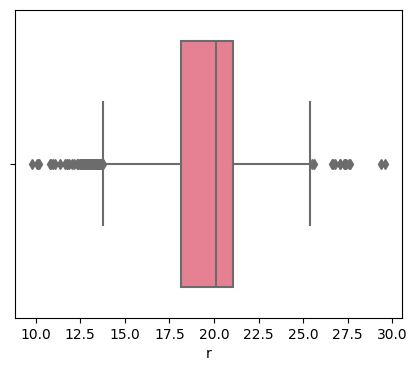

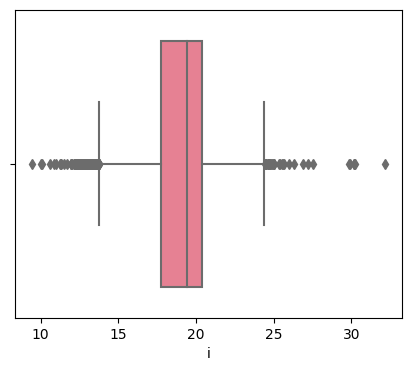

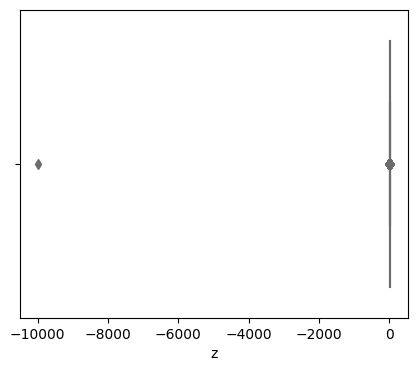

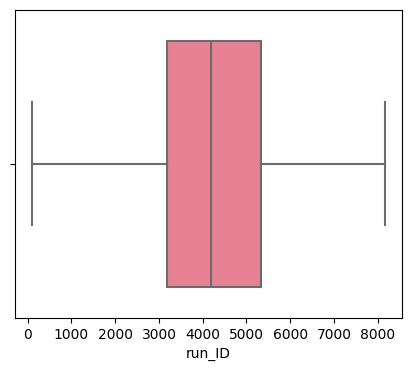

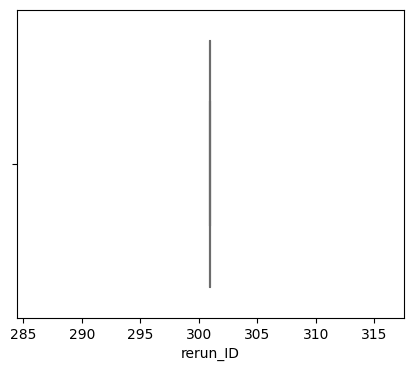

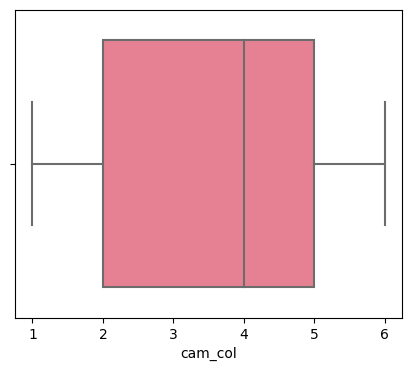

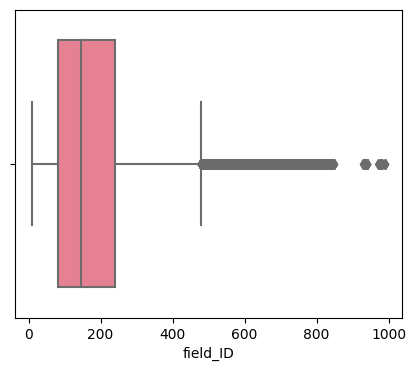

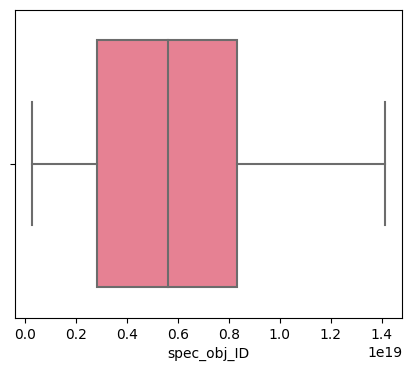

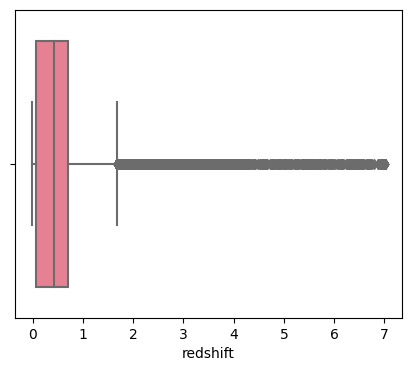

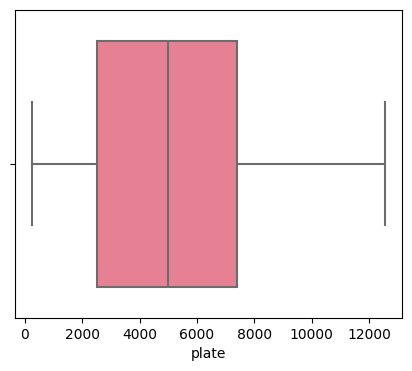

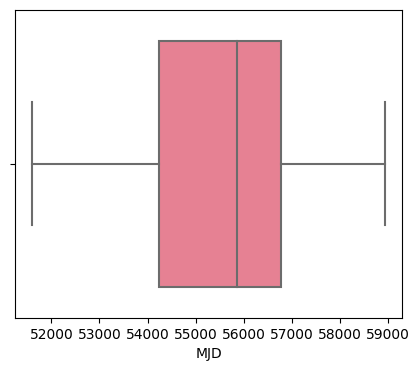

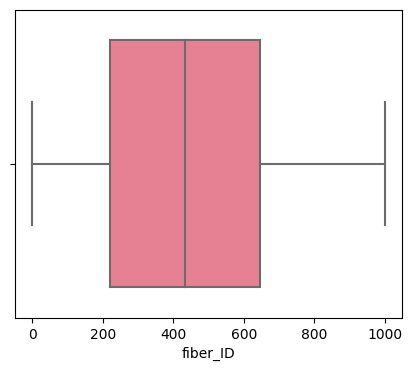

In [ ]:
def boxplots(col):
    plt.figure(figsize=(5,4))
    sns.boxplot(df,x=col,palette='husl')
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

## 2b.Handling Outliers

In [ ]:
def outlier(col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    IQR=q3-q1
    Lower=q1-1.5*IQR
    Upper=q3+1.5*IQR
    df[col].clip(Lower,Upper,inplace=True)

In [ ]:
for i in numerical_col:
    outlier(i)

## 3. Encoding
- We will use Label encoder for class variable as its target variable to convert it from categorical variable to numerical varaiable

In [ ]:
df['class']=df['class'].astype('category')
df['class']=df['class'].cat.codes

## Feature Construction

## 1. Split the data into Independent (x)  & Dependent( y) variables

In [ ]:
x= df.drop(['class'],axis=1)
y= df[['class']]

In [ ]:
x.head(2)

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2      79.0  6.543777e+18   
1  21.16812  21.61427    4518       301        5     119.0  1.176014e+19   

   redshift  plate    MJD  fiber_ID  
0  0.634794   5812  56354       171  
1  0.779136  10445  58158       427

In [ ]:
y.head(2)

class
0      0
1      0

## 4a. Check target variable data balance (Part of Feature transformation)

In [ ]:
y.value_counts()    # target variable data is imbalance

class
0        59445
2        21594
1        18961
dtype: int64

## 4b. Handle imbalance data (Part of Feature transformation)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_sam,y_sam=ros.fit_resample(x,y)
print(x_sam.shape,y_sam.shape,x.shape,y.shape)

(178335, 17) (178335, 1) (100000, 17) (100000, 1)


In [ ]:
y_sam.value_counts()

class
0        59445
1        59445
2        59445
dtype: int64

## 5. Feature Scaling (Part of Feature transformation)
- Feature scaling is a method used to normalize the range of independent variables or features of data. We can only do with independent variable not with dependent variable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((-1,1))
x = pd.DataFrame(sc.fit_transform(x_sam),columns=x_sam.columns)
y = y_sam

In [ ]:
x

obj_ID     alpha     delta         u         g         r         i  \
0      -0.131593 -0.246190  0.007605  0.278692  0.273988  0.138315  0.019019   
1       0.094992 -0.195428 -0.016376  0.413436  0.362095  0.514640  0.394813   
2      -0.131593 -0.210080  0.068278  0.486220  0.335502  0.175227  0.053333   
3       0.013970  0.881894 -0.638800  0.017529  0.511639  0.347429  0.270277   
4       0.985006  0.918236 -0.214641 -0.387204 -0.469239 -0.531606 -0.579399   
...          ...       ...       ...       ...       ...       ...       ...   
178330 -0.143731 -0.637236 -0.039758 -0.617644 -0.658680 -0.603762 -0.579825   
178331 -0.054108  0.335767  0.074592  0.144307  0.063405  0.159680  0.238619   
178332 -0.511502 -0.301849  0.251244  0.336771  0.387409  0.325542  0.159203   
178333 -0.052122  0.347496 -0.051647 -0.504659 -0.501534 -0.363552 -0.281385   
178334  0.608295 -0.413600 -0.040880 -0.289139 -0.329553 -0.315363 -0.295041   

               z    run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID  \
0       0.020893 -0.131504      -1.0     -0.6 -0.709712    -0.096830   
1       0.594074  0.094996      -1.0      0.6 -0.538954     0.657666   
2       0.052302 -0.131504      -1.0     -0.6 -0.534685    -0.298108   
3       0.113638  0.014032      -1.0     -0.2 -0.133404     0.446626   
4      -0.639375  0.985099      -1.0     -0.2 -0.462113    -0.046482   
...          ...       ...       ...      ...       ...          ...   
178330 -0.562415 -0.143673      -1.0     -0.2 -0.790822    -0.839576   
178331  0.391034 -0.054017      -1.0     -0.6  0.169691    -0.234741   
178332  0.068323 -0.511486      -1.0      0.2 -0.410886     0.304940   
178333 -0.212884 -0.052030      -1.0     -0.6 -0.551761    -0.786320   
178334 -0.278092  0.608345      -1.0      0.2 -0.415155    -0.521207   

        redshift     plate       MJD  fiber_ID  
0      -0.236324 -0.096816  0.296013 -0.659660  
1      -0.065361  0.657683  0.788640 -0.147147  
2      -0.225190 -0.298103  0.087930 -0.403403  
3       0.116104  0.446625  0.756144  0.549550  
4      -0.850652 -0.046495  0.250410  0.683684  
...          ...       ...       ...       ...  
178330 -0.988447 -0.839590 -0.629711  0.043043  
178331 -0.988427 -0.234753  0.123157  0.503504  
178332 -0.988008  0.304943  0.489623  0.241241  
178333 -0.988890 -0.786337 -0.484435  0.263263  
178334 -0.987770 -0.521212 -0.114145 -0.123123  

[178335 rows x 17 columns]

# Pricipal Component Analysis
- Principal component analysis is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)

In [ ]:
print(pd.DataFrame(x).shape)  # Shape before PCA
print(x_pca.shape)            # Shape after PCA

(178335, 17)
(178335, 9)


In [ ]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca, columns=component_names)
x_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.115570  0.184602  0.740638 -0.284239  0.166763  0.549607 -0.196141   
1 -1.479735  0.216557 -0.562838 -0.327057  0.442055  0.596737  0.052483   
2  0.012379  0.213135  0.693044 -0.138696  0.174446  0.179139 -0.135249   
3 -1.262026  0.060578  0.025772 -0.589218 -0.100216 -0.675303  0.482617   
4  0.353490 -1.388304 -0.408778 -0.853010 -0.747606 -0.768073 -0.124652   

        PC8       PC9  
0 -0.297695  0.093641  
1 -0.211497  0.002269  
2 -0.529240  0.261715  
3  0.071258 -0.691321  
4  0.957096 -0.083166

## PCA Explained variance

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33059279, 0.1324853 , 0.1114336 , 0.09511641, 0.0853148 ,
       0.06990812, 0.06365093, 0.0606025 , 0.03097365])

## PCA Cumulative variance

In [ ]:
c_variance=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
c_variance

array([33.06, 46.31, 57.45, 66.96, 75.49, 82.48, 88.85, 94.91, 98.01])

## PCA visualization

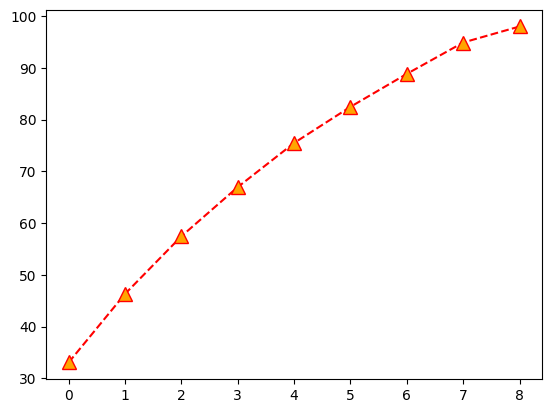

In [ ]:
plt.plot(c_variance,color='red', linestyle='dashed', marker='^',
         markerfacecolor='orange', markersize=10)
plt.show()

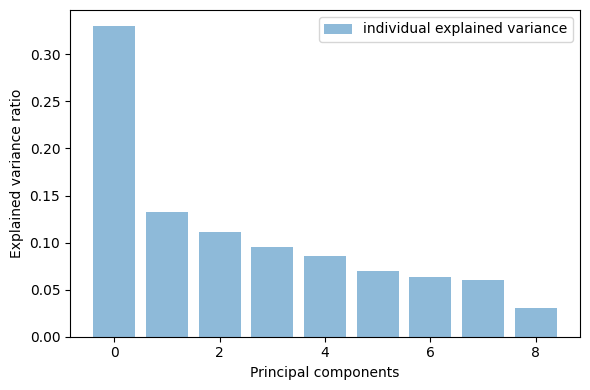

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(9), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

## 2. Split the data into train and test- Feature Construction

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.20,random_state=101,stratify=y)

# Model Building

## Model No. 1 - Logistic Regression
- It is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class.

In [ ]:
# Model building
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=100)
log=logit.fit(x_train, y_train)
# Predict
y_pred_train_log = logit.predict(x_train)
y_pred_test_log = logit.predict(x_test)
# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_log_test=accuracy_score(y_test,y_pred_test_log)
accuracy_log_train=accuracy_score(y_train,y_pred_train_log)
print('Logistic regression Train accuracy:', accuracy_score(y_train, y_pred_train_log))
print('------'*10)
print('Logistic regression Test accuracy:', accuracy_score(y_test, y_pred_test_log))

Logistic regression Train accuracy: 0.9322623153054644
------------------------------------------------------------
Logistic regression Test accuracy: 0.9342249137858525


## Confusion Matrix
- A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

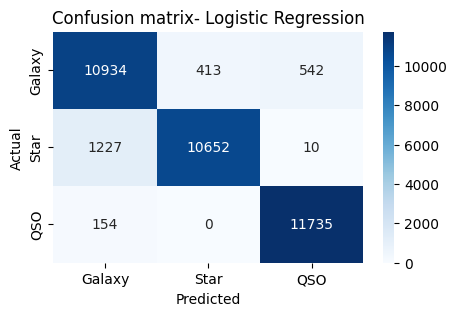

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2. Model No. 2 - Decision Tree
- A decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [ ]:
# Model building
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
#Predict
y_pred_train_dtree=dtree.predict(x_train)
y_pred_test_dtree=dtree.predict(x_test)
#Evaluate
accuracy_dtree_test=accuracy_score(y_test,y_pred_test_dtree)
accuracy_dtree_train=accuracy_score(y_train,y_pred_train_dtree)
print('Decision Tree - Train accuracy:', accuracy_score(y_train, y_pred_train_dtree))
print('-------'*10)
print('Decision Tree - Test accuracy:', accuracy_score(y_test, y_pred_test_dtree))

Decision Tree - Train accuracy: 1.0
----------------------------------------------------------------------
Decision Tree - Test accuracy: 0.9525611910169064


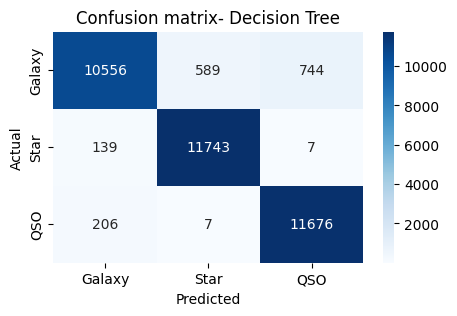

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_dtree),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Decision Tree")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Decision Tree Visualization

In [ ]:
# Using Post prunning method to handle overfitting probelm
def dtree_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(15,12),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

In [ ]:
# max depth at 5
prunned_dtree=DecisionTreeClassifier(max_depth=5)
prunned_dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.66      0.60      0.63     11889
           1       0.93      0.83      0.87     11889
           2       0.69      0.83      0.75     11889

    accuracy                           0.75     35667
   macro avg       0.76      0.75      0.75     35667
weighted avg       0.76      0.75      0.75     35667





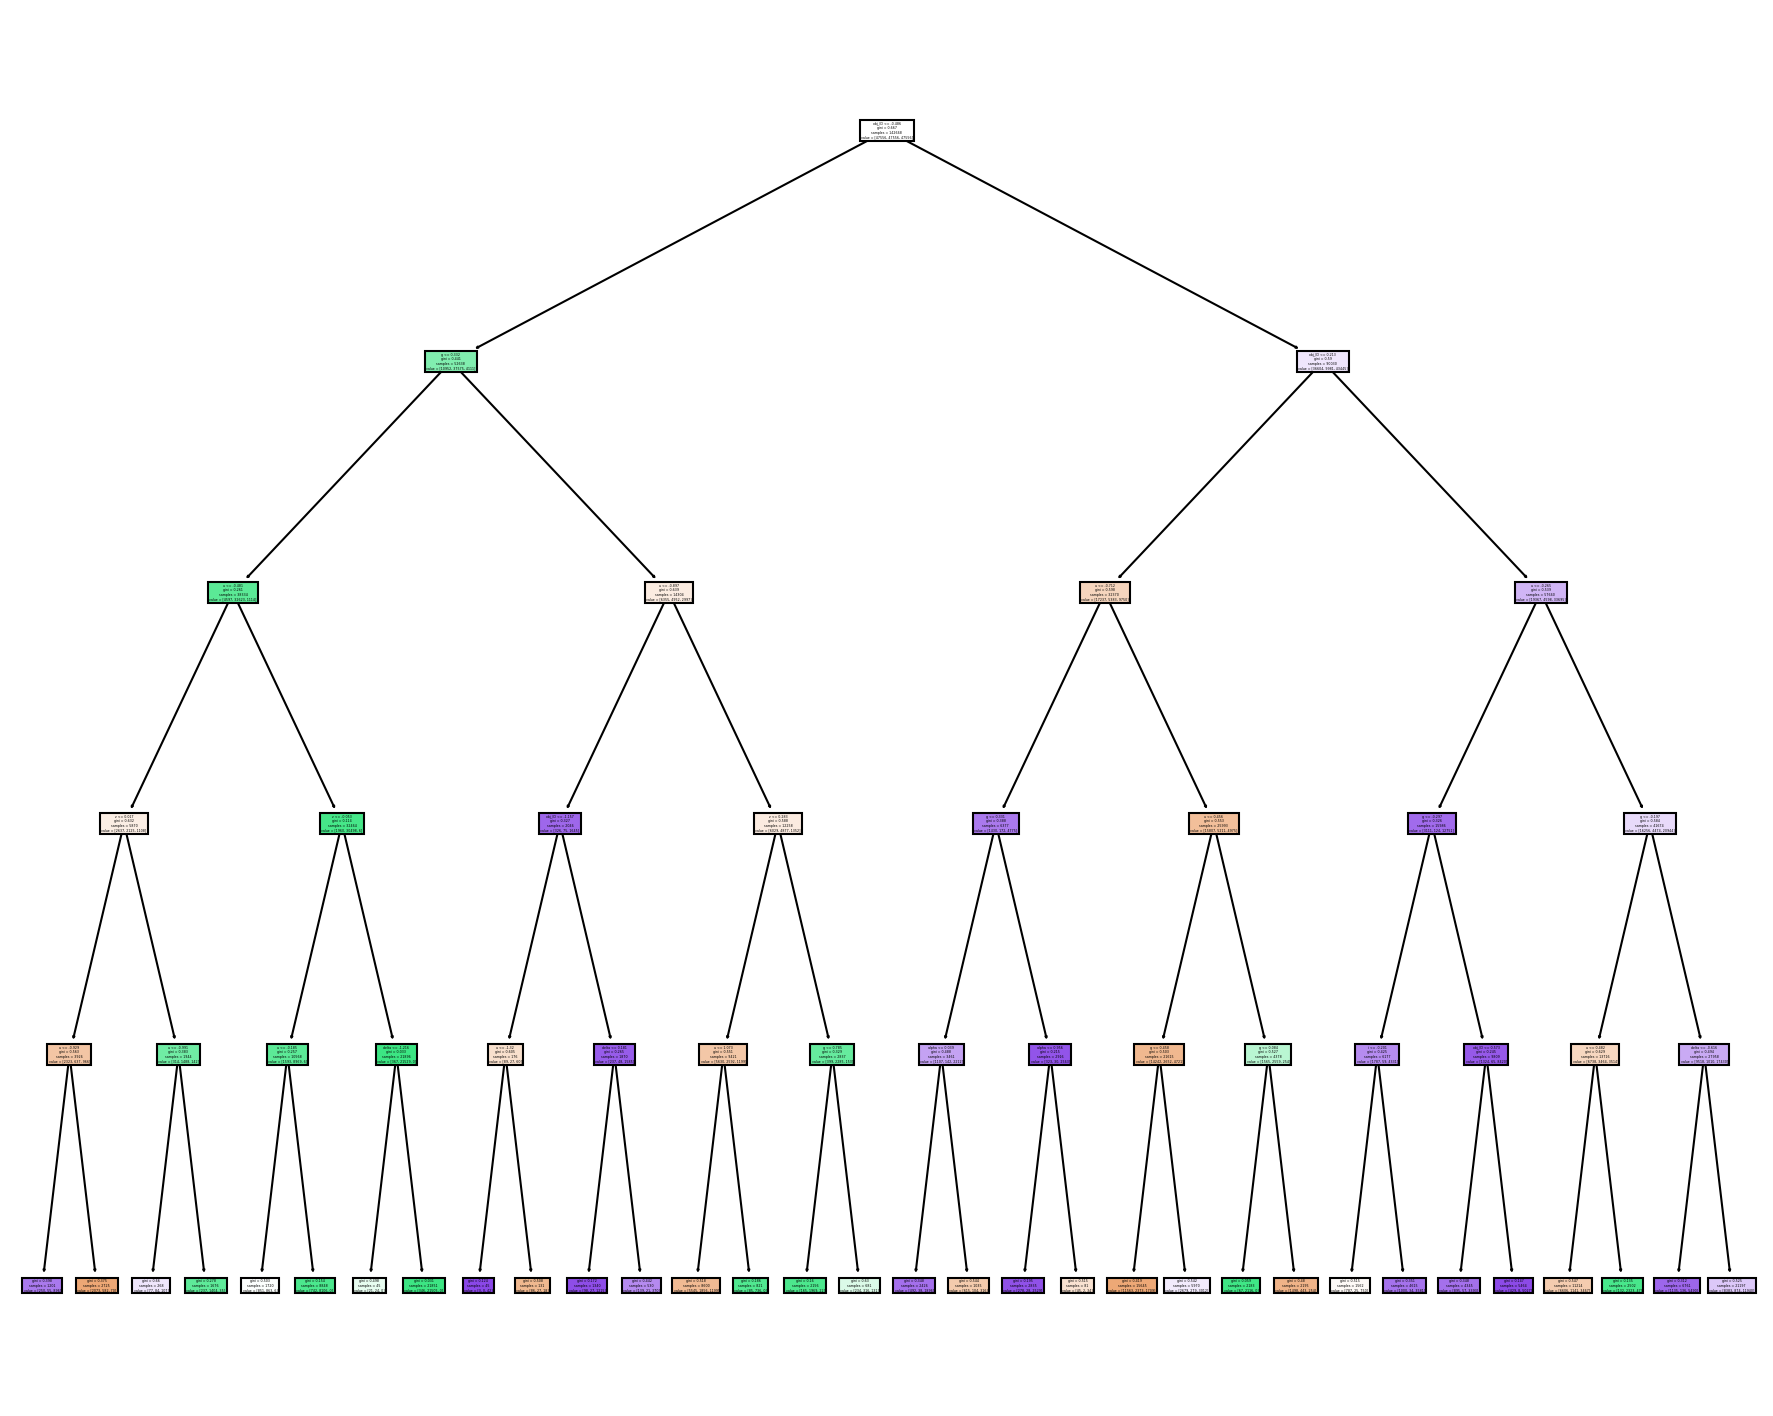

In [ ]:
dtree_model(prunned_dtree)

In [ ]:
# Predict
y_pred_prunned_train=prunned_dtree.predict(x_train)
y_pred_prunned_test=prunned_dtree.predict(x_test)
# Evaluate
print('Decision Tree post prunning- Train accuracy:',accuracy_score(y_train,y_pred_prunned_train))
print('-------'*10)
print('Decision Tree post prunning- Test accuracy:', accuracy_score(y_test,y_pred_prunned_test))

Decision Tree post prunning- Train accuracy: 0.7547452827543668
----------------------------------------------------------------------
Decision Tree post prunning- Test accuracy: 0.7508341043541649


## Model No. 3 - K Nearest Neighbors (KNN)
- The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
# Model building with K point as 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
# Predict
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)
#Evaluate
accuracy_knn_test=accuracy_score(y_test,y_pred_test_knn)
accuracy_knn_train=accuracy_score(y_train,y_pred_train_knn)
print('K nearest neighbor - Train accuracy:', accuracy_score(y_train, y_pred_train_knn))
print('-------'*10)
print('K nearest neighbor - Test accuracy:', accuracy_score(y_test, y_pred_test_knn))

K nearest neighbor - Train accuracy: 0.974444164073233
----------------------------------------------------------------------
K nearest neighbor - Test accuracy: 0.9471780637564134


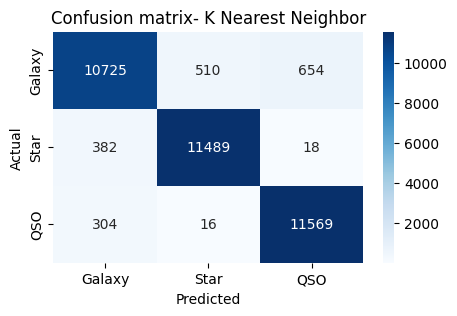

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_knn),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- K Nearest Neighbor")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
accuracy=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy.append(score.mean())

KeyboardInterrupt: ignored

#### Plotting the graph

In [ ]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40), accuracy, color='red', linestyle='dashed', marker='^',
         markerfacecolor='orange', markersize=10)
plt.title('Accuracy vs K Points')
plt.xlabel('K Points')
plt.ylabel('Accuracy')
plt.show()

## Model No. 4 - Bagging model
- Bagging (or Bootstrap aggregating) is a type of ensemble learning in which multiple base models are trained independently in parallel on different subsets of the training data.

In [ ]:
# Model building
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)# Predict
#Predict
y_pred_train_bag=bagging.predict(x_train)
y_pred_test_bag=bagging.predict(x_test)
# Evaluate
accuracy_bag_test=accuracy_score(y_test,y_pred_test_bag)
accuracy_bag_train=accuracy_score(y_train,y_pred_train_bag)
print('Bagging - Train accuracy:', accuracy_score(y_train, y_pred_train_bag))
print('-------'*10)
print('Bagging - Test accuracy:', accuracy_score(y_test, y_pred_test_bag))

NameError: ignored

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_bag),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Bagging")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 5 - Random Forest
- A random forest is a machine learning technique that utilizes ensemble learning - which is a technique that combines many classifiers to provide solutions to complex problems. It establishes the outcome based on the predictions of the decision trees and employs the bagging method to generate the required prediction. It eradicates the biggest limitation of decision tree - overfitting of dataset and increases precision. The main difference between the decision tree algorithm and the random forest algorithm is that establishing root nodes and segregating nodes is done randomly in the latter

In [ ]:
# Model building
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,oob_score=False)
rf.fit(x_train,y_train)
# Predict
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)
# Evaluate
accuracy_rf_test=accuracy_score(y_test,y_pred_test_rf)
accuracy_rf_train=accuracy_score(y_train,y_pred_train_rf)
print('Random Forest - Train accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('-------'*10)
print('Random Forest - Test accuracy:', accuracy_score(y_test, y_pred_test_rf))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Random Forest ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 6 - Naives Bayes
- The Naive Bayes algorithm is comprised of Naive and Bayes. It is called Naive because it assumes that the occurrence of a certain feature is independent of the occurrence of other features and it is called Bayes because it depends on the principle of Bayes' Theorem.

In [ ]:
# Model building
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
# Predict the model
y_pred_train_nb = nb.predict(x_train)
y_pred_test_nb = nb.predict(x_test)
# Evaluate
accuracy_nb_test=accuracy_score(y_test,y_pred_test_nb)
accuracy_nb_train=accuracy_score(y_train,y_pred_train_nb)
print('Naive Bayes -Train accuracy:', accuracy_score(y_train, y_pred_train_nb))
print('-------'*10)
print('Naive Bayes -Test accuracy:', accuracy_score(y_test, y_pred_test_nb))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_nb),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Naive Bayes ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 7 - Support Vector Machine Model
- Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression.They are extremely popular because of their ability to handle multiple continuous and categorical variables.The objective of the support vector machine algorithm is to find a maximum marginal hyperplane.

In [ ]:
# Radial Basis Function Kernel (RBF) - (Defaut SVM) Model building
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
#Predict
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)
#Evaluate
accuracy_rbf_test=accuracy_score(y_test,y_pred_test_rbf)
accuracy_rbf_train=accuracy_score(y_train,y_pred_train_rbf)
print('Rbf - SVM - Train accuracy:', accuracy_score(y_train, y_pred_train_rbf))
print('-------'*10)
print('Rbf - SVM - Test accuracy:', accuracy_score(y_test, y_pred_test_rbf))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_rbf),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Support Vector Machine ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 8 - Adaptive boosting or AdaBoost
- Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.

In [ ]:
# Model building
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ad=ada.fit(x_train, y_train)
# Predict
y_pred_ad = ada.predict(x_test)
y_pred_ad_train = ada.predict(x_train)
# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_ad_test=accuracy_score(y_test,y_pred_ad)
accuracy_ad_train=accuracy_score(y_train,y_pred_ad_train)
print('AdaBoost Train accuracy:', accuracy_score(y_train, y_pred_ad_train))
print('-------'*5)
print('AdaBoost Test accuracy:', accuracy_score(y_test, y_pred_ad))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_ad),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Adaboost")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 9 - Gradient Boosting
- Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.

In [ ]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd=gdb.fit(x_train, y_train)
# Predict
y_pred_gd = gdb.predict(x_test)
y_pred_gd_train = gdb.predict(x_train)
# Evaluate
accuracy_gd_test=accuracy_score(y_test,y_pred_gd)
accuracy_gd_train=accuracy_score(y_train,y_pred_gd_train)
print('GradientBoosting Train accuracy:', accuracy_score(y_train, y_pred_gd_train))
print('-------'*5)
print('GradientBoosting Test accuracy:', accuracy_score(y_test, y_pred_gd))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_gd),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Gradient Boosting ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 10 - Extreme Gradient Boosting or XGBoost
- XGBoost is an implementation of gradient boosting that’s designed for computational speed and scale. It leverages multiple cores on the CPU, allowing for learning to occur in parallel during training

In [ ]:
# Model building
from xgboost import XGBClassifier
xgb = XGBClassifier()
xg=xgb.fit(x_train, y_train)
# Predict
y_pred_xg = xgb.predict(x_test)
y_pred_xg_train = xgb.predict(x_train)
# Evaluate
accuracy_xg_test=accuracy_score(y_test,y_pred_xg)
accuracy_xg_train=accuracy_score(y_train,y_pred_xg_train)
print('XGBoost Train accuracy:', accuracy_score(y_train, y_pred_xg_train))
print('-------'*5)
print('XGBoost Test accuracy:', accuracy_score(y_test, y_pred_xg))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_xg),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- XG Boost ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model No. 11 Voting ensemble
- Voting is an ensemble method that combines the performances of multiple models to make predictions.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
evc=VotingClassifier(estimators = [('Logistic',logit),('Decision_tree', dtree),('KNN',knn),('Bagging',bagging),
                                   ('Randomforest',rf),('NaiveBayes',nb), ('SVM_RBF' ,svm_rbf),('Adaboost',ad),
                                   ('Gradient_boosting',gd),('Extra_Gradient_booting',xg)],voting='hard')
evc_model=evc.fit(x_train,y_train)
evc_pred=evc.predict(x_test)
evc_pred_train=evc.predict(x_train)

accuracy_evc=accuracy_score(y_test,evc_pred)
accuracy_evc_train=accuracy_score(y_train,evc_pred_train)

print('Voting ensemble train accuracy:', accuracy_score(y_train, evc_pred_train))
print('---------------'*5)
print('Voting ensemble train accuracy:', accuracy_score(y_test, evc_pred))

In [ ]:
Labels = ['Galaxy','Star','QSO']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,evc_pred),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Voting Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Result

## Combining all models in Tabular format for better understanding

In [ ]:
Models=['Logistic','Decision_tree','KNN','Bagging','Random_forest','Naive_bayes','SVM',
        'Adaboost','GradientBoosting','XGboost','Voting_Classifier']
Trainacc=[accuracy_log_train,accuracy_dtree_train,accuracy_knn_train,accuracy_bag_train,accuracy_rf_train,accuracy_nb_train,
          accuracy_rbf_train,accuracy_ad_train,accuracy_gd_train, accuracy_xg_train,accuracy_evc_train]
Testacc=[accuracy_log_test,accuracy_dtree_test,accuracy_knn_test,accuracy_bag_test,accuracy_rf_test,accuracy_nb_test,
         accuracy_rbf_test, accuracy_ad_test,accuracy_gd_test, accuracy_xg_test,accuracy_evc]

In [ ]:
Combined_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,
                                'Test Accuracy':Testacc})
print(Combined_accuracy)

## Accuracy visualization

In [ ]:
sns.barplot(x='Model name',y='Train Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Train accuracy- Model wise')
plt.show()

In [ ]:
sns.barplot(x='Model name',y='Test Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy- Model wise')
plt.show()

## Cross validation of highest accuracy model- Random Forest Classifier

In [ ]:
train_accuracy_rf = cross_val_score(rf,x_train, y_train, cv=10)
crossval_train_rf=train_accuracy_rf.mean()
test_accuracy_rf = cross_val_score(rf,x_test, y_test, cv=10)
crossval_test_rf=test_accuracy_rf.mean()
print('Random forest after Cross validation Train accuracy:', crossval_train_rf)
print('-------'*10)
print('Random forest  after Cross validation Test accuracy:', crossval_test_rf)

# **Conclusion**
- I used various Supervised machine learning models to solve the classification problem performed on 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey).
- The dataset has 59,445 galaxies, 21,593 stars and 18,961 quasar objects.
- Dimension reduction was done with the help of Principal Component Analysis.
- For Evaluation I used accuracy score & confusion matrix.
- Random Forest classifier with Train accuracy at 100% and Test accuracy at 97% gives the highest accuracy amongst all the models but it has overfitting issue.
- So after cross validation to deal with overfitting issue of Random Forest model train accuracy is 97% and Test accuracy is 93% making it the best model to solve the classification problem for this dataset.
- Decision Tree follows next in accuracy but post prunning its gives accuracy of 75% for both Train & Test data.
- Gaussian Naive Bayes Classifier performs the worst with 76% accuracy for Train data & 77% for Test data making it almost at par with Decision Tree accuracy.
- Voting ensemble method yielded Train accuracy of 97% & test accuracy of 95%.
- Concluding the same, we can say that rest all models performed more than 80% for both Train & Test data and also there was no high variance problem in any of the model.

In [ ]:
print( " The END ")